In [1]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib.lines import Line2D
from tqdm import *
%matplotlib inline  

In [48]:
def combine_background_files(folder='../data/bkg_Zj/', lumi=37*1000, nfiles=200):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    
    frames = [pd.read_csv(folder+'events_'+str(i)+'.evt', header=0, delimiter=',', skipinitialspace=True) for i in range(nfiles)]
        
    data = pd.concat(frames)
    data.meta = pd.read_csv(folder+'events_0.meta', header=0, delimiter=',', skipinitialspace=True)
    if 'weight' in data.columns:
        data['weight'] *= (data.meta['cxn']*lumi/data.meta['sum_weight'])[0]
    else:
        data['weight'] = (data.meta['cxn']*lumi / data.meta['nevt'])[0]  
    return data

In [51]:
Zj_df = combine_background_files('../data/bkg_Zj/')
Wj_df = combine_background_files('../data/bkg_Wj/')
tt_d_df = combine_background_files('../data/bkg_ttbar_dilep//')
tt_s_df = combine_background_files('../data/bkg_ttbar_semilep//')
QCD_df = combine_background_files('../data/bkg_qcd/', nfiles=399)

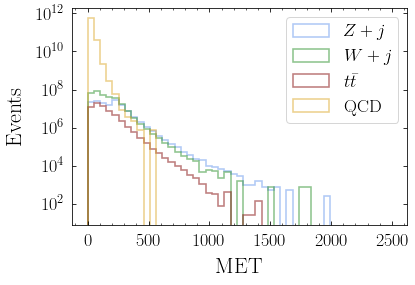

In [55]:
bins = np.linspace(0,2500,50)

plt.hist(Zj_df['MEt'], weights=Zj_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="$Z+j$")
plt.hist(Wj_df['MEt'], weights=Wj_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="$W+j$")

tt_df = pd.concat([tt_d_df, tt_s_df])

plt.hist(tt_df['MEt'], weights=tt_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="$t\\bar t$")

plt.hist(QCD_df['MEt'], weights=QCD_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="QCD")

plt.xlabel("MET")


plt.legend()
plt.ylabel("Events")
plt.yscale("log")